In [203]:
# 필요 데이터 크롤링
import requests
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from urllib.parse import quote
from tqdm.notebook import tqdm
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By

In [204]:
driver = webdriver.Chrome(executable_path = 'C:/Users/Bestc/Desktop/빅데이터 지능형 서비스 개발과정(멀티캠퍼스)/설치프로그램/Selenium/chromedriver.exe')
URL = 'https://brunch.co.kr/magazine/brickscity'
driver.get(URL)

<ipython-input-204-275fa7b8c1b9>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = 'C:/Users/Bestc/Desktop/빅데이터 지능형 서비스 개발과정(멀티캠퍼스)/설치프로그램/Selenium/chromedriver.exe')


In [205]:
from tqdm.notebook import tqdm

for _ in tqdm(range(10)):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)

  0%|          | 0/10 [00:00<?, ?it/s]

In [206]:
import re
from hanspell import spell_checker # 최대 500자까지만 가능하기에 문장을 나눠서 반복해야함.
def spell_check(sequence):
    result = spell_checker.check(sequence)
    checked_sequence = result.checked
    return checked_sequence

title_list = []
content_list = []

for i in tqdm(range(1, 113)): # 해당 페이지 글이 112개
    driver.find_element(By.XPATH, f'/html/body/div[3]/div[2]/ul/li[{i}]/a').send_keys(Keys.CONTROL + "\n")
    time.sleep(3)
    driver.switch_to.window(driver.window_handles[1])
    title = driver.find_element(By.XPATH, f'/html/body/div[3]/div[1]/div[1]/div/div[3]/h1').text
    title_list.append(title)
    text = driver.find_element(By.XPATH, f'/html/body/div[3]/div[1]/div[2]/div[1]').text
    text_list = []
    for text in text.split('\n'):
        if text != '' and 'Artravel+' not in text and '좋아요' not in text and '댓글' not in text and 'Top' not in text\
            and '공유하기' not in text and '여행기' not in text and ':' not in text and 'Day' not in text and '0' != text\
            and '>' not in text and '경유' not in text and '-' not in text and '+' not in text and 'www' not in text and 'KRW' not in text\
            and '인천국제공항 (Incheon International Airport, ICN)' != text and '경유 1회' != text and '숙박' != text \
            and '민박 집이용 1일 약 15,000원 한달경비' != text and '1' != text and '2' != text and '3' != text and '4' != text\
            and '도시간 이동 약' != text and '항공료' != text and '항공' != text and '교통' != text:
            text_list.append(text)
    # 불필요한 문장 제거를 위해 앞뒤에 있는 메일주소 및 글 제목만 제외 / text_list[2:-4]
    content = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣0-9.()A-Za-z:?! ]', '', ' '.join(text_list[2:-4]))
    # print(len(content.split('. ')))
    content = content.replace(' )', ')')
    content = content.replace('( ', '(')
    content = content.replace('(중략)', ' ')
    content = content.replace('  ', ' ')
    content = content.replace('  ', ' ')
    content_list.append(content)
    driver.close()
    driver.switch_to.window(driver.window_handles[0])

  0%|          | 0/112 [00:00<?, ?it/s]

In [207]:
df_trip_city = pd.DataFrame({'title' : title_list, 'content' : content_list})
df_trip_city.to_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/KoGPT2_Data/Crawling Data/df_trip_city.csv', index= False)
df_trip_city['content'].to_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/KoGPT2_Data/Crawling Data/df_trip_city.txt', index= False)

In [208]:
pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/KoGPT2_Data/Crawling Data/df_trip_city.csv').content[5]

'한동안 웅크린 곰이 되어 집과 회사만 오가다 보니 사람들의 표정과 풍경을 본 게 언제인지 모르겠다. 그럴 때 가장 먼저 생각나는 곳이 내게는 서점이다. 나를 환기하고 토닥여주는 서점. 서귀포에 있는 서점 어나더페이지에 가기 위해 긴 잠에서 깨어나 오랜만에 걸음을 내디뎠다. 버스에 탄 사람들을 보고 있자니 이제는 마스크가 사람들의 표정이 되어버린 것 같다. 두 시간여를 달려 서귀포 대정읍에 도착했다. 어나더페이지는 대정초등학교 옆 작은 골목길에 있다. 파란색 차양막 아래 서점 문을 열고 들어서자 달마시안 강아지상이 먼저 반긴다. 목소리로만 인사를 건네던 사장님이 이내 어디선가 나타났다. 서고에 있는 책은 판매하는 책이고 여닫이문 안에 있는 책은 마음껏 꺼내 읽어도 된다고 한다. 짐을 풀고 제주 으름꽃덩굴차를 주문했다. 생소한 이름인데 구수하니 맛이 좋다. 서점이 크지 않아 서고가 한눈에 들어온다. 기후변화 환경 사회 등 다양한 이슈의 책이 많았다. 송악산 개발에 관한 리플렛이 눈에 띄었다. 왜 송악산을 보존해야 하는지 다양한 근거자료로 뒷받침하고 있었다. 리플렛을 읽고 여닫이문 안에서 무례한 사람에게 웃으며 대처하는 법을 집어 들었다. 종종 사회에서 예민한 사람으로 분류되어 힘든 내게 꼭 필요한 책이었다. 책은 제목처럼 무례한 사람에게 대처하는 방법을 제시하기도 하고 결코 내가 예민한 것이 아니라는 위로를 주기도 했다. 서점 곳곳에 놓인 친환경 제품을 보니 사장님의 관심사가 나와 비슷한 듯해서 용기를 내 말을 걸었다. 서점을 운영한 지는 한 달이 조금 넘었고 제주 토박이였으나 한동안 제주를 떠나 있었다고 한다. 리플렛에서 읽었던 송악산 이야기도 듣고 책에 관한 이야기도 나누다가 우리가 국제개발협력 분야에서 일했던 동료임을 알게 됐다. 이 분야 사람을 우연히 만나는 것은 꽤 드문 일 특히 제주에서 만나리라고는 생각지도 못했다. 어쩐지 서점 분위기나 사장님 취향이나 범상치 않다고 생각했는데. 그때부터 우린 반가운 친구 동료가 되었다. 1시간 정도 이야기를 나누다 

In [209]:
# 워드 클라우드로 글의 구조 체크
# 한글 폰트 적용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/정직_1.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [210]:
sdf = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\한국어불용어100.txt', encoding ='UTF-8', sep = '\s+', header = None)
df_trip_city = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/KoGPT2_Data/Crawling Data/df_trip_city.csv')
sdf.head()

,0,1,2
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898


In [211]:
from konlpy.tag import Okt
okt = Okt()
stopwords = set(sdf[0])
from tqdm.notebook import tqdm
tokenized_data = []
for sentence in tqdm(df_trip_city.content):
    morphs = okt.morphs(sentence.strip(), stem = True)
    temp_list = [word for word in morphs if word not in stopwords]
    tokenized_data.extend(temp_list)

  0%|          | 0/112 [00:00<?, ?it/s]

In [212]:
len(tokenized_data)

87470

In [213]:
tokenized_data[:10]

['꽃', '을', '보다', '부르다', '.', '이리', '오다', '보라', '고', '이리']

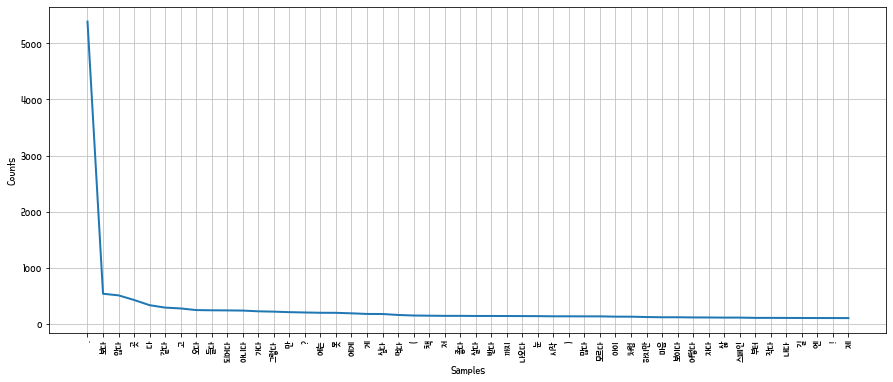

In [214]:
import nltk
stoptext = ''' 하다 문서 에 바로가기 언론사 분 선정 측 의 사단 네이버뉴스 과 는 있다 를 인 은 와 하고 으로
              관련 로 없다 경 당 없다 날 이다 찾다 대해 첫 되다 도 뉴스 에서 을 뉴시스 조선일보 한국 연합뉴스 대 회 비단 위 기
              당시 대한 은 예비 
           '''
stopwords2 = stoptext.split()
new_tokens = [word for word in tokenized_data if word not in stopwords2]
keywords = nltk.Text(new_tokens, name = '윤석열 검색결과')
plt.figure(figsize = (15, 6))
keywords.plot(50)
plt.show()

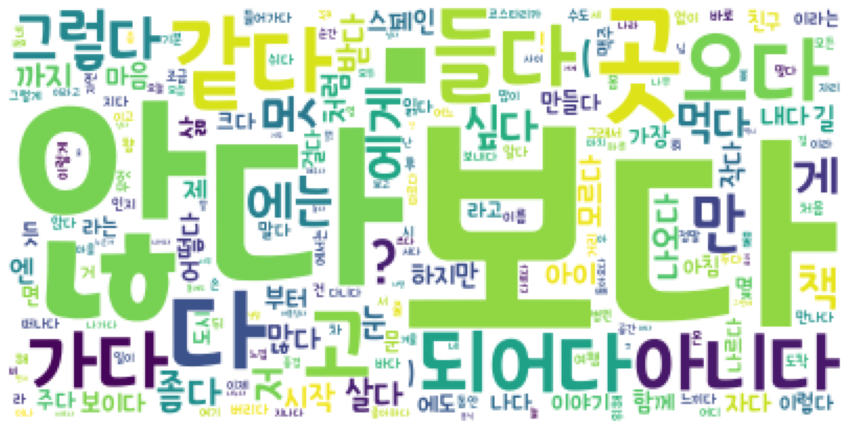

In [215]:
from wordcloud import WordCloud
from PIL import Image

data = keywords.vocab().most_common(300)
wc = WordCloud(
    font_path = font_path, relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))
plt.figure(figsize = (15, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()